<img src="data/vecteezy_vector-or-illustration-of-pickup-cartoon-car-passes-by_35766859.jpg"
    style="width:280px; float: right; margin: 0 40px 1px 40px;"></img>
    
# Pollution on the crossroads in Lviv

People in my city say that traffic jam have increased significantly in the last 10 years. Does this mean that the level of pollution on the main streets has also increased? 
The website https://opendata.city-adm.lviv.ua/ contains the results of measurements of pollutants at crossroads in Lviv for more than 10 years.
Let's see what we can discover from it.

<div style="border: 12px solid #ADD8E6;"></div>


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# get data from here:
# https://opendata.city-adm.lviv.ua/dataset/air-pollutant-measurements-lviv/resource/8271500b-53b3-4b36-aebb-3b713b0b988c

df = pd.read_csv('data/pollution_lviv.csv', 
                index_col=0,
                parse_dates=['period'])

<div style="border: 12px solid #ADD8E6;"></div>

### Getting familiar with the data


In [3]:
df.head()

,location,name_pollutant_substance,measurement_results,period,maximum_permissible_concentration,deviation
_id,,,,,,
1,проспект Чорновола В. – вул. Городоцька,вуглецю оксид,8.250,2011-03-31,5.0,3.250
2,проспект Чорновола В. – вул. Городоцька,азоту оксид,0.302,2011-03-31,0.4,-0.100
3,проспект Чорновола В. – вул. Городоцька,азоту діоксид,0.204,2011-03-31,0.2,0.004
4,проспект Чорновола В. – вул. Городоцька,ангідрид сірчистий,0.054,2011-03-31,0.5,-0.450
5,проспект Чорновола В. – вул. Городоцька,вуглецю оксид,8.680,2011-06-30,5.0,3.680


In [4]:
df.shape

(6388, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6388 entries, 1 to 6388
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   location                           6388 non-null   object        
 1   name_pollutant_substance           6388 non-null   object        
 2   measurement_results                5788 non-null   float64       
 3   period                             6388 non-null   datetime64[ns]
 4   maximum_permissible_concentration  6388 non-null   float64       
 5   deviation                          5788 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 349.3+ KB


In [6]:
# NAs check
df.isna().sum()

location                               0
name_pollutant_substance               0
measurement_results                  600
period                                 0
maximum_permissible_concentration      0
deviation                            600
dtype: int64

In [7]:
#duplicates check 
df.duplicated().sum()

0

In [8]:
# brief look at dates
df['period'].value_counts().index.sort_values(ascending=False)

DatetimeIndex(['2023-12-31', '2023-09-30', '2023-06-30', '2023-04-01',
               '2022-12-31', '2022-09-30', '2022-07-31', '2022-04-30',
               '2021-12-31', '2021-09-30', '2021-06-30', '2021-04-30',
               '2021-02-28', '2020-12-31', '2020-09-30', '2020-06-30',
               '2020-03-31', '2019-12-31', '2019-09-30', '2019-06-30',
               '2019-03-31', '2018-12-31', '2018-09-30', '2018-06-30',
               '2018-03-31', '2017-12-31', '2017-09-30', '2017-06-30',
               '2017-03-31', '2016-12-31', '2016-09-30', '2016-06-30',
               '2016-03-31', '2015-12-31', '2015-09-30', '2015-06-30',
               '2015-03-31', '2014-12-31', '2014-09-30', '2014-06-30',
               '2014-03-31', '2013-12-31', '2013-09-30', '2013-06-30',
               '2013-03-31', '2012-12-31', '2012-09-30', '2012-06-30',
               '2012-03-31', '2011-12-31', '2011-09-30', '2011-06-30',
               '2011-03-31'],
              dtype='datetime64[ns]', name='per

<div style="border: 12px solid #ADD8E7;"></div>

### Cleaning and filtering data. Adding new columns. 

In [9]:
# don't need rows without measurement results
df.dropna(inplace=True)

In [10]:
# index and columns renaming
df.rename_axis('id', inplace=True)
df.rename(columns = {'name_pollutant_substance' : 'substance',
                     'measurement_results':'concentration',
                     'maximum_permissible_concentration' : 'max_permissible_concentration'
}, inplace=True)

In [11]:
# as measurements were provided several times per year let's create two additional columns for year and season
# deviation from maximum permissible concentration in % will say to us much more

df['year'] = df['period'].dt.year
df['season'] = df['period'].dt.month.apply(
    lambda x: 'winter' if x > 11 else 'fall' if x > 8 else 'summer' if x > 5 else 'spring' if x > 2 else 'winter')
df['deviation_percentage'] = (df['concentration']/df['max_permissible_concentration']*100)-100

In [12]:
df.head()

,location,substance,concentration,period,max_permissible_concentration,deviation,year,season,deviation_percentage
id,,,,,,,,,
1,проспект Чорновола В. – вул. Городоцька,вуглецю оксид,8.250,2011-03-31,5.0,3.250,2011,spring,65.0
2,проспект Чорновола В. – вул. Городоцька,азоту оксид,0.302,2011-03-31,0.4,-0.100,2011,spring,-24.5
3,проспект Чорновола В. – вул. Городоцька,азоту діоксид,0.204,2011-03-31,0.2,0.004,2011,spring,2.0
4,проспект Чорновола В. – вул. Городоцька,ангідрид сірчистий,0.054,2011-03-31,0.5,-0.450,2011,spring,-89.2
5,проспект Чорновола В. – вул. Городоцька,вуглецю оксид,8.680,2011-06-30,5.0,3.680,2011,summer,73.6


In [13]:
# brief look at location before filtering location, only Lviv city 
df['location'].str.split(' ').str.get(0).value_counts()

location
вул.        4540
проспект    1036
площа        184
с.            12
м.             8
смт            8
Name: count, dtype: int64

In [14]:
# names of locations outside of Lviv city start with 'м.', 'с.', 'смт' so this cases will not be included
df = df[df['location'].str.split(" ").str.get(0).str.contains('вул|площа|проспект', regex=True)]

In [15]:
# getting rid of leading and trailing spaces 
df.loc[:, 'location'] = df['location'].str.strip()

<div style="border: 12px solid #ADD8E6;"></div>

### Aggregation and analysis

In [16]:
# average measurement results per year for each pollutant
avg_else_poll_per_year = df.query('substance != "вуглецю оксид"').groupby(['year', 'substance'])['concentration'].agg('mean').reset_index().sort_values('year', ascending=False)
avg_carbon_poll_per_year = df.query('substance == "вуглецю оксид"').groupby(['year', 'substance'])['concentration'].agg('mean').reset_index().sort_values('year', ascending=False)

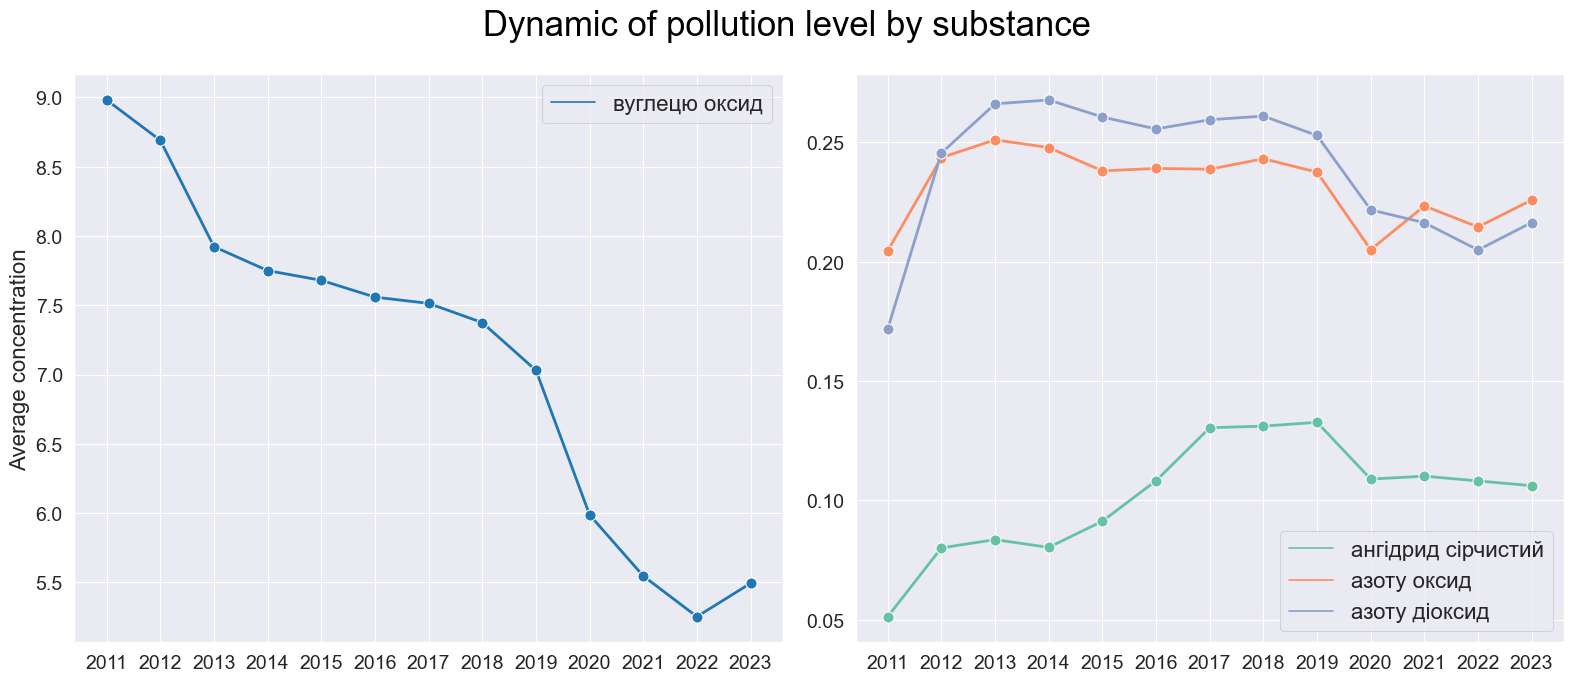

In [17]:
# plotting dynamic of pollution level to understand the tendency
plt.figure(figsize=(16,7))
plt.suptitle('Dynamic of pollution level by substance', fontsize=25)
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1.6)

#subplot for CO2
plt.subplot(1,2,1) # rows, columns, panel selected
sns.lineplot(data=avg_carbon_poll_per_year, x='year', y='concentration', hue='substance', 
             marker='o', markersize=8, linewidth=2)
plt.xlabel(None)
plt.ylabel('Average concentration', fontsize=16)
plt.legend(fontsize=16)
plt.xticks(avg_carbon_poll_per_year['year'].unique())

#subplot for other substances
plt.subplot(1,2,2) # rows, columns, panel selected
sns.lineplot(data=avg_else_poll_per_year, x='year', y='concentration', hue='substance', 
             marker='o', markersize=8, palette='Set2', linewidth=2)
plt.xlabel(None)
plt.ylabel(None)
plt.legend(fontsize=16)
plt.xticks(avg_else_poll_per_year['year'].unique())

plt.tight_layout()

In [18]:
# average deviation in % per season
deviation_by_season = df.groupby(['season', 'substance'])['deviation_percentage'].mean().round(1).reset_index()
pivoted_deviation_by_season = deviation_by_season.pivot_table(index='substance', columns='season', values='deviation_percentage').sort_index(ascending=False)

# sorry, but my year starts on spring :)
pivoted_deviation_by_season = pivoted_deviation_by_season.reindex(columns=['spring', 'summer', 'fall', 'winter'])
pivoted_deviation_by_season

season,spring,summer,fall,winter
substance,,,,
вуглецю оксид,36.3,40.4,45.9,37.7
ангідрид сірчистий,-80.7,-78.7,-78.2,-79.1
азоту оксид,-44.7,-42.1,-40.5,-41.7
азоту діоксид,13.6,20.7,23.0,17.7


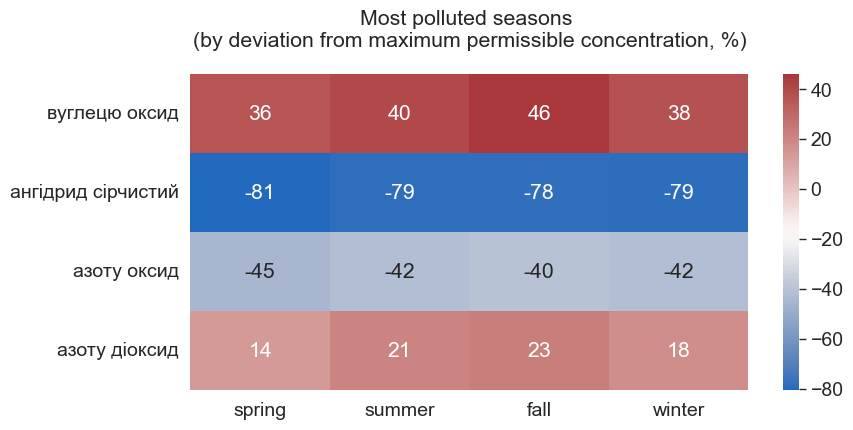

In [19]:
# visualising pollution by season with heatmap
plt.figure(figsize =(9,4))
plt.title('Most polluted seasons \n(by deviation from maximum permissible concentration, %)', pad=20)
sns.heatmap(pivoted_deviation_by_season, annot=True, cmap='vlag')
plt.xlabel(None)
plt.ylabel(None)
plt.subplots_adjust(top=0.9)

<div style="border: 12px solid #ADD8E6;"></div>

### Calculating pollution level by crossroads with CO2 and NO2 as the actual concentration exceeds the norms for only such substances

In [20]:
# decided to calculate mean

# first filter df
df_filtered = df[df['substance'].isin(['вуглецю оксид','азоту діоксид'])]

poll_by_street = df_filtered.groupby(['location', 'year'])['concentration'].mean().reset_index()
top_poll_2023 = poll_by_street.query('year == 2023').sort_values(by='concentration', ascending=False).head(10)
least_poll_2023 = poll_by_street.query('year == 2023').sort_values(by='concentration', ascending=False).tail(10)

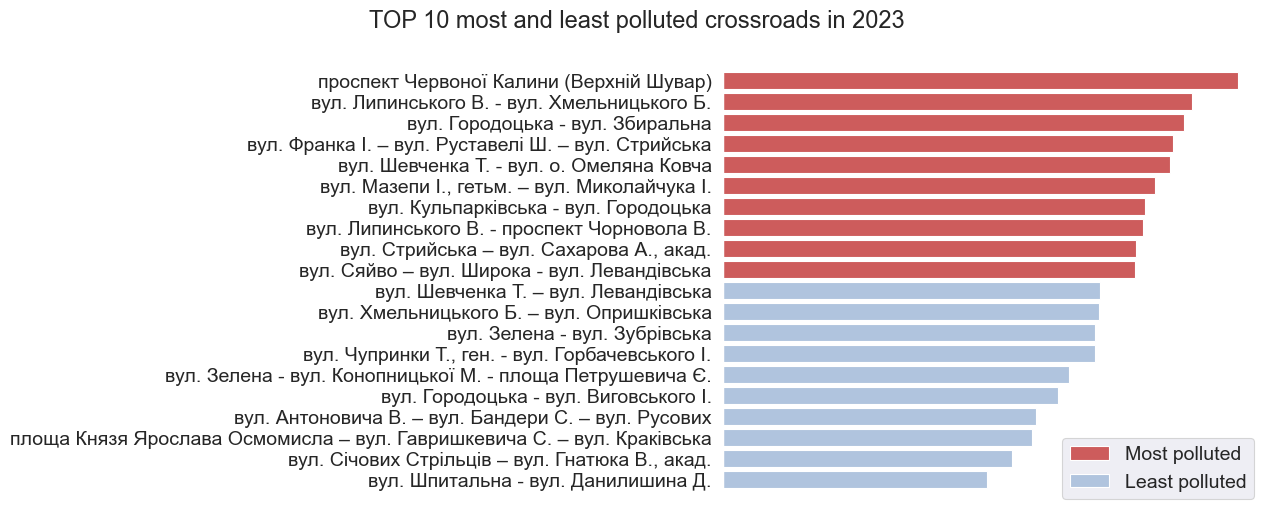

In [21]:
fig, axes = plt.subplots(figsize=(13, 5.5))
fig.suptitle('TOP 10 most and least polluted crossroads in 2023', y=0.95, fontsize=17)
axes.set_facecolor('white')

# Create the barh plot with data ofor the TOP10 most polluted crossroads
axes.barh(top_poll_2023['location'], top_poll_2023['concentration'], color='indianred', label='Most polluted')
axes.invert_yaxis()
axes.spines[['right', 'top', 'bottom']].set_visible(False)
axes.xaxis.set_visible(False)

# Add to the barh plot data for Less polludet crossroads
axes.barh(least_poll_2023['location'], least_poll_2023['concentration'], color='lightsteelblue', label='Least polluted')
axes.spines[['right', 'top', 'bottom']].set_visible(False)
axes.xaxis.set_visible(False)

axes.legend(loc='lower right')
plt.tight_layout()

<div style="border: 12px solid #ADD8E7;"></div>

### Inferences
### Looks like increase in traffic didn't negatively affect air quality. CO2 concentration has dropped almost twice in last 10 years even though it is still above permissible concentration. I suppose this can be caused by improvement of environmental qualities of cars of the city population. 
### I also cannot recommend morning run on those streets from top 10 most polluted crossroads. Especially on fall which is the most polluted season.